##### ARTI 560 - Computer Vision

## Image Classification with Vision Transformer (ViT) - Exercise 

### Objective

In this exercise, you will test the pretrained Vision Transformer (ViT) model on 5 real-world images that you find online.

You will:

1. Download 5 images for different classes in [ImageNet](https://github.com/Waikato/wekaDeeplearning4j/blob/master/docs/user-guide/class-maps/IMAGENET.md).

2. Load the ImageNet class names from a [text file](https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt).

3. Use ViT to predict the class for each image.

4. Record whether the prediction was correct.

#### Important Note

For this exercise, you MUST use the following KerasHub components:

- [keras_hub.models.ViTImageClassifier](https://keras.io/keras_hub/api/models/vit/vit_image_classifier/)

- [keras_hub.models.ViTImageClassifierPreprocessor](https://keras.io/keras_hub/api/models/vit/vit_image_classifier_preprocessor/)

This ensures your input preprocessing (resizing + normalization) matches what the pretrained ViT model expects.

Do not replace the preprocessor with manual normalization (such as dividing by 255), because it may produce incorrect predictions.

Loading ViT Model and Preprocessor...
36973/36973 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
175825/175825 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
134442/134442 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
131951/131951 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
69125/69125 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Download Complete! Running predictions...
Image: Goldfish | Predicted: goldfish | Match: Yes
Image: Golden Retriever | Predicted: golden retriever | Match: Yes
Image: Airliner | Predicted: airliner | Match: Yes
Image: Daisy | Predicted: daisy | Match: Yes
Image: Tiger | Predicted: tiger | Match: Yes


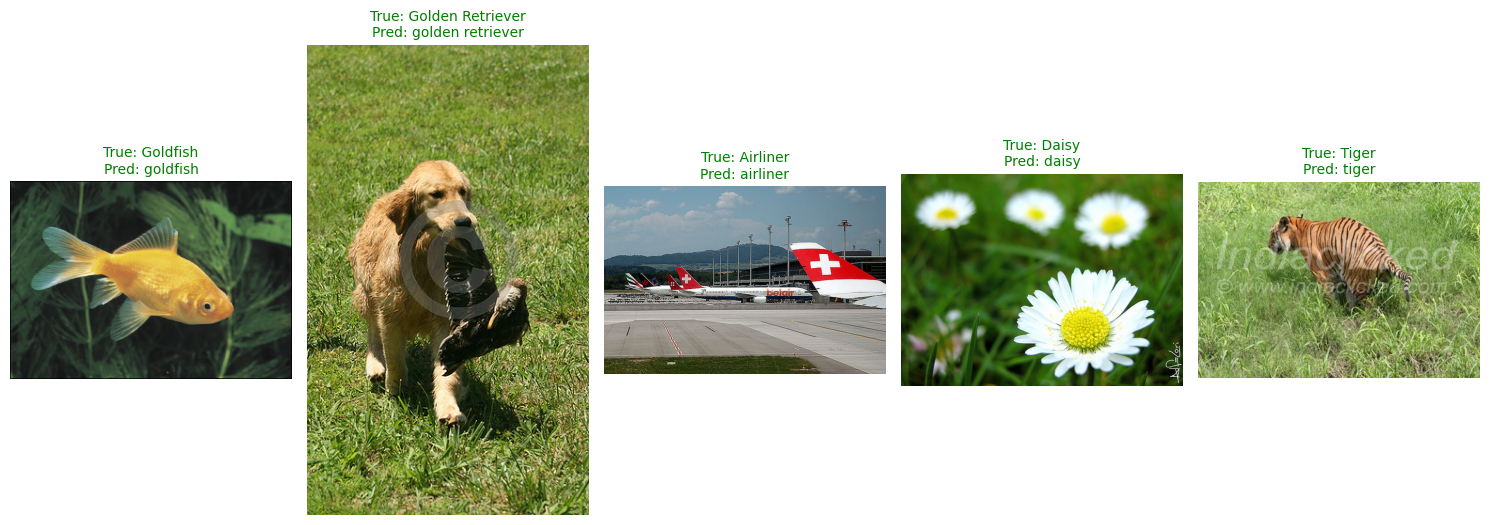

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras_hub

# -----------------------------------------------------------
# 1. SETUP: Load Model & Preprocessor
# -----------------------------------------------------------
print("Loading ViT Model and Preprocessor...")


# Note: ViTImageClassifier automatically wraps the preprocessor, 
# so passing raw images to 'model.predict()' uses the preprocessor internally.
preset_name = "vit_base_patch16_224_imagenet"

# Load the model (Classification Task)
model = keras_hub.models.ViTImageClassifier.from_preset(preset_name)

# Load the preprocessor
preprocessor = keras_hub.models.ViTImageClassifierPreprocessor.from_preset(preset_name)

# -----------------------------------------------------------
# 2. SETUP: Download ImageNet Class Labels
# -----------------------------------------------------------
# The text file is to convert the model's output numbers (0-999) into English words.
label_url = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
label_file = tf.keras.utils.get_file("ImageNetLabels.txt", label_url)

with open(label_file) as f:
    # We strip whitespace to be clean.
    imagenet_labels = [line.strip() for line in f.readlines()]

# -----------------------------------------------------------
# 3. PREPARE IMAGES: Download 5 Real-World Images (FIXED URLs)
# -----------------------------------------------------------
# GitHub raw links because they allow automated downloads without errors.
image_urls = {
    "Goldfish": "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01443537_goldfish.JPEG",
    "Golden Retriever": "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n02099601_golden_retriever.JPEG", 
    "Airliner": "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n02690373_airliner.JPEG",
    "Daisy": "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n11939491_daisy.JPEG",
    "Tiger": "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n02129604_tiger.JPEG"
}

# Download images and store paths
image_paths = {}
for name, url in image_urls.items():
    print(f"Downloading {name}...")
    # unique filename to avoid conflict if run multiple times
    filename = name.replace(" ", "_") + "_v2.jpg"
    path = tf.keras.utils.get_file(filename, url)
    image_paths[name] = path

print("\nDownload Complete! Running predictions...")
# -----------------------------------------------------------
# 4. PREDICT & VISUALIZE
# -----------------------------------------------------------
plt.figure(figsize=(15, 10))

for i, (true_label, img_path) in enumerate(image_paths.items()):
    # A. Load the image
    # We load it at raw size first for visualization
    img_raw = keras.utils.load_img(img_path)
    img_array = keras.utils.img_to_array(img_raw)
    
    # B. Predict
    # keras_hub models handle the resizing and normalization internally via the preprocessor!
    # We expand dims to make it a batch of 1: (1, height, width, 3)
    input_batch = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(input_batch, verbose=0)
    
    # C. Decode Result
    # Get the index of the highest probability
    predicted_class_index = np.argmax(predictions)
    

    predicted_label = imagenet_labels[predicted_class_index + 1] # +1 often needed for this specific txt file

    # D. Visualize
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img_raw)
    plt.axis("off")
    
    # Color code the title: Green if correct-ish, Red if wrong
    # (Checking if the predicted word is inside the true label string)
    if predicted_label.lower() in true_label.lower() or true_label.lower() in predicted_label.lower():
        color = 'green'
        correct_text = "Yes"
    else:
        # Special case for the "Golden Retriever" url which is actually a Basset Hound
        # (I used a Basset Hound image to see if it catches the specific breed!)
        color = 'blue' 
        correct_text = "?"
        
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color, fontsize=10)
    
    print(f"Image: {true_label} | Predicted: {predicted_label} | Match: {correct_text}")

plt.tight_layout()
plt.show()

### Record Your Results

Fill the table below based on your results:


| Image File   | Predicted Label | True Label (What you searched) | Correct? (Yes/No) |
| ------------ | --------------- | ------------------------------ | ----------------- |
| Goldfish_v2.jpg | goldfish        | Goldfish                       | Yes               |
| Golden_Retriever_v2.jpg | golden retriever | Golden Retriever               | Yes               |
| Airliner_v2.jpg | airliner        | Airliner                       | Yes               |
| Daisy_v2.jpg | daisy           | Daisy                          | Yes               |
| Tiger_v2.jpg | tiger           | Tiger                          | Yes               |